In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# 扩张一个维度
train_images = np.expand_dims(train_images, -1)

In [4]:
train_images.shape

(60000, 28, 28, 1)

In [5]:
test_images = np.expand_dims(test_images, -1)

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3),
                                 input_shape = train_images.shape[1:],
                                 activation='relu')
          )
model.add(tf.keras.layers.Conv2D(64,
                                 (3, 3),
                                 activation='relu',
                                 padding='same')
          )
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128,
                                 (3, 3),
                                 activation='relu',
                                 padding='same')
          )
model.add(tf.keras.layers.Conv2D(128,
                                 (3, 3),
                                 activation='relu',
                                 padding='same')
          )
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256,
                                 (3, 3),
                                 activation='relu',
                                 padding='same')
          )
model.add(tf.keras.layers.Conv2D(256,
                                 (3, 3),
                                 activation='relu',
                                 padding='same')
          )
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(512,
                                 (3, 3),
                                 activation='relu',
                                 padding='same')
          )
model.add(tf.keras.layers.Conv2D(512,
                                 (3, 3),
                                 activation='relu',
                                 padding='same')
          )
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [9]:
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
1875/1875 [==============================] - 29s 15ms/step - loss: 1.0383 - acc: 0.6093 - val_loss: 0.4894 - val_acc: 0.8141

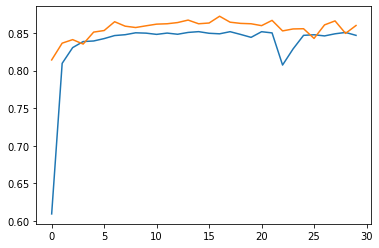

In [10]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')

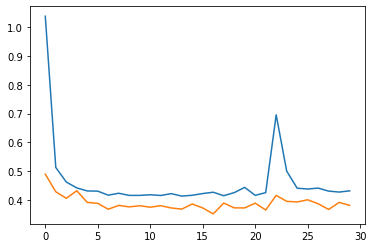

In [11]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
